<p align="center">
  <img src="../utils/Imagenes/UFC.jpg" alt="Texto alternativo" />
</p>


<h1 align="center">Análisis exploratorio: Métricas de la UFC</h1>
&nbsp; 


Este **EDA** se centra principalmente en abordar las hipótesis más comúnmente planteadas por los *"opinólogos de bar"* 🍻 en el mundo de los deportes de contacto 🥋.

Ha sido realizada a través de la exploración de 2 **DATASETS** 📊 encontrados en [Kaggle](https://www.kaggle.com/)
repletos de estadísticas específicas 📈 y haciendo **WebsCrapping** 🔍 para sacar alguna variable concreta más.

Como conclusión **ofrecerá una perspectiva** más clara de **pasos a seguir** para llegar a ser campeón de la UFC🏆🏆.

&nbsp; 

#### A lo largo del análisis, podrás ir visualizando los resultados de las **hipótesis** que han planteado esta investigación y el proceso de resolución de la misma:

---

##### [1. ¿Qué relación hay entre la **guardia** y el Éxito en la carrera? 🤼](#Guardia)

##### [2. ¿Qué probabilidad hay de **ganar** respecto a una buena **defensa de derribo**? 🥋](#Defensa)

##### [3. ¿Cómo afecta la **edad** en un enfrentamiento? 👵👦](#Edad)

##### [4. ¿Es más probable ganar por **KO** en divisiones de **peso pesado** respecto a las demás? 💪⚖️](#KO's)

##### [5. ¿Cómo influye la **altura** y el alcance? 📏](#Altura)

##### [6. ¿En que **país** ha habido mas participantes en la **UFC**? 🌍](#Mapamundi)

---


&nbsp;







Ántes que nada, aquí una lista de las librerías que se han ido necesitando

In [506]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as bs
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Los **datasets recopilados** inicialmente no vienen con los datos estructurados y limpios como se necesitan para abordar las hipotésis.  
Se procede a explicar los pasos seguidos:


### **Data set:** Estadísticas de los peleadores

In [507]:
#Leyendo DataSet de Peleadores
estadisticas_peleador = pd.read_csv("../data/Estadisticas_peleador/estadisticas_peleador.csv")
fuente_1 = "https://www.kaggle.com/datasets/maksbasher/ufc-complete-dataset-all-events-1996-2024/data"
estadisticas_peleador.head(5)

,name,wins,losses,height,weight,reach,stance,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
0,Amanda Ribas,12.0,5.0,160.02,56.70,167.64,Orthodox,30.0,4.63,0.40,3.40,0.61,2.07,0.51,0.85,0.7
1,Rose Namajunas,13.0,6.0,165.10,56.70,165.10,Orthodox,31.0,3.69,0.41,3.51,0.63,1.38,0.47,0.59,0.5
2,Karl Williams,10.0,1.0,190.50,106.59,200.66,Orthodox,34.0,2.87,0.52,1.70,0.60,4.75,0.50,1.00,0.2
3,Justin Tafa,7.0,4.0,182.88,119.75,187.96,Southpaw,30.0,4.09,0.54,5.02,0.47,0.00,0.00,0.50,0.0
4,Edmen Shahbazyan,13.0,4.0,187.96,83.91,190.50,Orthodox,26.0,3.60,0.52,4.09,0.45,2.24,0.38,0.63,0.6


In [508]:
#Comprobando los Missing-Values
estadisticas_peleador.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2478 non-null   object 
 1   wins         2478 non-null   float64
 2   losses       2478 non-null   float64
 3   height       2478 non-null   float64
 4   weight       2478 non-null   float64
 5   reach        1823 non-null   float64
 6   stance       2401 non-null   object 
 7   age          2318 non-null   float64
 8   SLpM         2478 non-null   float64
 9   sig_str_acc  2478 non-null   float64
 10  SApM         2478 non-null   float64
 11  str_def      2478 non-null   float64
 12  td_avg       2478 non-null   float64
 13  td_acc       2478 non-null   float64
 14  td_def       2478 non-null   float64
 15  sub_avg      2478 non-null   float64
dtypes: float64(14), object(2)
memory usage: 310.0+ KB


In [509]:
#Creando la copia:
df_1 = estadisticas_peleador.copy()

#### Para mayor compresión del análisis se iran **traduciendo** los datasets.

In [510]:
#Diccionarios de traducción:

ingles_columnas1 = ['name', 'wins', 'losses', 'height', 'weight', 'reach', 'stance', 'age',
                    'SLpM', 'sig_str_acc', 'SApM', 'str_def', 'td_avg', 'td_acc', 'td_def',
                    'sub_avg']

español_columnas1= ["Nombre","Victorias","Derrotas","Altura","Peso","Alcance",
                    "Guardia","Edad","Golpes_min","Golpes_acer","Golpes_abs",
                    "Golpes_def","Derribos_med","Derribos_acer", "Derribos_def",
                    "Sumision_int"]

guardia_dict = {'Orthodox':'Ortodoxo', 'Southpaw':'Zurdo', 'Switch':'Ambidiestro', 'Open Stance':'Guardia Baja'}

In [511]:
#Traduciendo:
df_1.rename(columns=dict(zip(ingles_columnas1, español_columnas1)), inplace=True)
df_1['Guardia'] = df_1['Guardia'].replace({**guardia_dict})

In [512]:
#Eliminando las filas que contengan algún missing-values:
df_1.dropna(subset=['Alcance', 'Guardia', 'Edad'], inplace=True)


In [513]:
#Comprobando si hay peleadores duplicados:
peleadores_duplicados = df_1['Nombre'].duplicated().sum()
df_1[df_1['Nombre'].duplicated(keep= False)]

,Nombre,Victorias,Derrotas,Altura,Peso,Alcance,Guardia,Edad,Golpes_min,Golpes_acer,Golpes_abs,Golpes_def,Derribos_med,Derribos_acer,Derribos_def,Sumision_int
382,Bruno Silva,23.0,10.0,182.88,83.91,187.96,Ortodoxo,34.0,4.43,0.51,5.33,0.43,1.09,0.27,0.73,0.0
638,Bruno Silva,13.0,5.0,162.56,56.70,165.10,Ortodoxo,34.0,3.05,0.46,3.09,0.59,2.57,0.30,0.64,0.3
1879,Edward Faaloloto,2.0,5.0,185.42,70.31,177.80,Ortodoxo,39.0,2.28,0.32,6.25,0.44,1.01,0.25,0.33,0.0
1897,Edward Faaloloto,2.0,5.0,177.80,70.31,177.80,Ortodoxo,39.0,2.28,0.32,6.25,0.44,1.01,0.25,0.33,0.0


El peleador **Bruno silva** se actualizó con mayor número de victorias asi que debemos borrar la fila antigua.  

Edward **Faaloloto** simplemente hubo una confusión con su altura, se queda el valor mas alto.

In [514]:
#Eliminando peleadores duplicados:
df_1.drop([638, 1897], inplace=True)

La **nacionalidad** de los peleadores no estaba definida en el dataset, así que se procederá a hacer **WebsCrapping** de la *"wikipedia"*.  

La **función principal** quedará encapsulada en una clase en [MainWebscrapping.py](../utils/Webs_crapping/MainWebscrapping.py) y función de *"obtener_nacionalidad"* en [Webscrapping.py](../utils/Webs_crapping/Webscrapping.py).

Se generara un ***".csv"*** con los luchadores y su nacionalidad.

In [515]:
#Leyendo csv:
nacionalidad_peleador = pd.read_csv("../data/Nacionalidad_peleador/nacionalidades_luchadores.csv")
nacionalidad_peleador.head()

,Luchador,Nacionalidad
0,Amanda Ribas,Brasileña
1,Rose Namajunas,EstadounidenseLituana
2,Karl Williams,missingvalue
3,Justin Tafa,Neozelandés
4,Edmen Shahbazyan,Estadounidense


In [516]:
#Insertando columna "Nacionalidad" 
nacionalidad = nacionalidad_peleador.iloc[:, 1]  
estadisticas_peleador = df_1.insert(1, 'Pais', nacionalidad)

In [517]:
# Eliminar filas con NaN solo en la columna 'Nacionalidad'
df_1_clean = df_1.dropna(subset=['Pais'])
df_1_clean= df_1_clean[~df_1_clean['Pais'].str.contains('missingvalue', na=False)] 
   

Los países no estan normalizados, se utilizará un diccionario para corregir ese error.

In [518]:
# Diccionario paises normalizados
pais_dict = {'estado': 'Estados Unidos', 'brasi': 'Brasil', 'mexic': 'México', 'finlan': 'Finlandia','pana': 'Panamá',
            'cuba': 'Cuba', 'esp': 'España', 'arme': 'Armenia', 'nige': 'Nigeria','rus': 'Rusia','uzb': 'Uzbekistán',
            'ingl': 'Inglaterra','chi': 'China', 'neoze': 'Nueva Zelanda', 'suda': 'Sudáfrica', 'marr': 'Marruecos',
            'austr': 'Australia','pola': 'Polonia','sue': 'Suecia','isra': 'Israel','gale': 'Gales','ecua': 'Ecuador',
            'brit': 'Inglaterra','esco': 'Escocia','ucra': 'Ucrania','suri': 'Surinam','fili': 'Filipinas','canad': 'Canadá',
            'afg': 'Afganistán','argen': 'Argentina','peru': 'Perú','tay': 'Tayikistán','georg': 'Georgia','jap': 'Japón',
            'fran': 'Francia','ita': 'Italia','ira': 'Irak','puerto': 'Puerto Rico','urug': 'Uruguay','tún': 'Túnez',
            'rum': 'Rumanía','let': 'Letonia','neerl': 'Holanda','irla': 'Irlanda','belg': 'Bélgica','costar': 'Costa Rica',
            'portu': 'Portugal','cro': 'Croacia','grie': 'Grecia','dane': 'Dinamarca','boliv': 'Bolivia','liban': 'Líbano',
            'kaz': 'Kazajistán','surcor': 'Corea del Sur','cameru': 'Camerún','bosn': 'Bosnia','guya': 'Guyana',
            'búlg': 'Bulgaria','colom': 'Colombia','isla': 'Islandia','tail': 'Tailandia', 'litu': 'Lituania', 
            'ale': 'Alemania','suiz': 'Suiza','serb': 'Serbia','congo': 'Congo','ghan': 'Ghana','molda': 'Moldavia',
            'kirg': 'Kirguistán','jama': 'Jamaica','holand': 'Holanda'}

In [519]:
#Remplazando Países normalizados:

def reemplazar_pais(pais):
    pais_lower = pais.lower() 
    for clave, nombre in pais_dict.items():
        if clave in pais_lower:
            return nombre
    return pais  

df_1_clean['Pais'] = df_1_clean['Pais'].apply(reemplazar_pais)

#print(f"Paises únicos: {df_1_clean['Pais'].unique()}")


In [520]:
#Añadiento Países normalizados al DataFrame
df_1_clean['Pais'] = df_1_clean['Pais'].apply(reemplazar_pais)

In [521]:
#Reseteamos el indice:
df_1_clean.reset_index(drop=True, inplace=True)


In [522]:
#Guardando DataFrame en csv:
#df_1_clean.to_csv("../data/Estadisticas_peleador/Estadisticas_peleador_limpio.csv")


In [523]:
#Estadisticas_peleador_limpio:
df_1_clean.head()

,Nombre,Pais,Victorias,Derrotas,Altura,Peso,Alcance,Guardia,Edad,Golpes_min,Golpes_acer,Golpes_abs,Golpes_def,Derribos_med,Derribos_acer,Derribos_def,Sumision_int
0,Amanda Ribas,Brasil,12.0,5.0,160.02,56.70,167.64,Ortodoxo,30.0,4.63,0.40,3.40,0.61,2.07,0.51,0.85,0.7
1,Rose Namajunas,Estados Unidos,13.0,6.0,165.10,56.70,165.10,Ortodoxo,31.0,3.69,0.41,3.51,0.63,1.38,0.47,0.59,0.5
2,Justin Tafa,Nueva Zelanda,7.0,4.0,182.88,119.75,187.96,Zurdo,30.0,4.09,0.54,5.02,0.47,0.00,0.00,0.50,0.0
3,Edmen Shahbazyan,Estados Unidos,13.0,4.0,187.96,83.91,190.50,Ortodoxo,26.0,3.60,0.52,4.09,0.45,2.24,0.38,0.63,0.6
4,Payton Talbott,Estados Unidos,8.0,0.0,177.80,61.23,177.80,Ambidiestro,25.0,8.05,0.54,3.58,0.51,0.00,0.00,0.90,0.5


### Variables totales:

- **Peleadores**: 694 🥊

- **Métricas**: 17 📒

&nbsp; 

### Continuamos con la **limpieza** del siguiente set de datos ***"Enfrentamientos"***

In [524]:
#Leyendo DataSet de Enfrentamientos
enfrentamientos = pd.read_csv("../data/Enfrentamientos/Enfrentamientos.csv")
fuente_2 = "https://www.kaggle.com/datasets/maksbasher/ufc-complete-dataset-all-events-1996-2024/data"
enfrentamientos.head(5)

,event,date,location,r_fighter,b_fighter,status,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,weight_class,method,method_detailed,round,time
0,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Rose Namajunas,Amanda Ribas,win,0.0,0.0,93.0,83.0,1.0,4.0,0.0,0.0,Women's Flyweight,U-DEC,NaN,5.0,5:00
1,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Karl Williams,Justin Tafa,win,0.0,0.0,40.0,21.0,7.0,0.0,1.0,0.0,Heavyweight,U-DEC,NaN,3.0,5:00
2,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Edmen Shahbazyan,AJ Dobson,win,1.0,0.0,27.0,15.0,1.0,0.0,0.0,0.0,Middleweight,KO/TKO,Punches,1.0,4:33
3,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Payton Talbott,Cameron Saaiman,win,1.0,0.0,79.0,31.0,0.0,0.0,0.0,0.0,Bantamweight,KO/TKO,Punches,2.0,0:21
4,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Youssef Zalal,Billy Quarantillo,win,0.0,0.0,33.0,10.0,2.0,0.0,2.0,0.0,Featherweight,SUB,Rear Naked Choke,2.0,1:50


In [525]:
#Verificando los missing_values:
enfrentamientos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7582 entries, 0 to 7581
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   event            7497 non-null   object 
 1   date             7497 non-null   object 
 2   location         7497 non-null   object 
 3   r_fighter        7497 non-null   object 
 4   b_fighter        7497 non-null   object 
 5   status           7582 non-null   object 
 6   r_kd             7476 non-null   float64
 7   b_kd             7476 non-null   float64
 8   r_str            7476 non-null   float64
 9   b_str            7476 non-null   float64
 10  r_td             7476 non-null   float64
 11  b_td             7476 non-null   float64
 12  r_sub            7476 non-null   float64
 13  b_sub            7476 non-null   float64
 14  weight_class     7497 non-null   object 
 15  method           7497 non-null   object 
 16  method_detailed  3836 non-null   object 
 17  round         

In [526]:
#Creandp copia:
df_2 = enfrentamientos.copy()

In [527]:
#Eliminando columnas que no serán objeto de estudio:
df_2.drop(['status','r_kd','b_kd', 'r_str', 'b_str', 'r_td', 'b_td', 'r_sub', 'b_sub'], axis=1, inplace=True)

In [528]:
#Eliminando cualquier fila que tenga un solo missingvalue:
df_2.dropna(inplace=True)


Se cambiarán todas las filas y columnas que estén en ingles para mayor comprensión a la hora de trabajarlas

In [529]:
#Importando diccionario de traducciones:

#Diccionario de columnas
ingles_columnas2 = ["event","date","location","r_fighter",
                    "b_fighter","weight_class","method",
                    "method_detailed","round","time"]

español_columnas2= ["Evento","Día","Donde",
                    "Ganador","Perdedor","Division",
                    "Metodo","Detalles","Round","Tiempo"]

#Todas las divisiones
division_dict = {'Middleweight': 'Peso Medio',
                'Bantamweight': 'Peso Gallo',
                'Featherweight': 'Peso Pluma',
                'Heavyweight': 'Peso Pesado',
                "Women's Bantamweight": 'Peso Gallo',
                'Lightweight': 'Peso Ligero',
                'Flyweight': 'Peso Mosca',
                "Women's Strawweight": 'Peso Paja',
                'Welterweight': 'Peso Welter',
                'Light Heavyweight': 'Peso Semipesado',
                "Women's Flyweight": 'Peso Mosca',
                'Catch Weight': 'Peso Pactado',
                "Women's Featherweight": 'Peso Pluma',
                'Super Heavyweight': 'Peso Super Pesado',
                'Open Weight': 'Peso Abierto'}

#Técnicas de Golpeo:
dict_golpes = {"Punches":"Golpes",
                "Kick":"Patada",
                "Punch":"Puño",
                "Elbows":"Codos",
                "Elbow":"Codo",
                "Flying Knee":"Rodilla Voladora",
                "Knees":"Rodillas",
                "Knee":"Rodilla",
                "Kicks":"Patadas",
                "Spinning Back Kick":"Patada Circular",
                "Spinning Back Fist":"Puñetazo Circular",
                "Spinning Back Elbow":"Codazo Circular",
                "Headbutts":"Cabezazos",
                "Slam":"Golpe Bajo"}

#Técnicas de Grappling y Estrangulaciones
dict_suelo = {"Rear Naked Choke":"Estrangulación Trasera",
                "D'Arce Choke":"Estrangulación D'Arce",
                "Guillotine Choke":"Estrangulación Guillotina",
                "Arm Triangle":"Triángulo de Brazo",
                "Armbar":"Llave de Brazo",
                "Triangle Choke":"Estrangulación Triangular",
                "Anaconda Choke":"Estrangulación Anaconda",
                "Neck Crank":"Torcedura de Cuello",
                "Kimura":"Llave Kimura",
                "Kneebar":"Llave de Rodilla",
                "Inverted Triangle" : "Triángulo Invertido",
                "Von Flue Choke" : "Estrangulación Von Flue",
                "Scarf Hold" : "Sujeción de Bufanda",
                "Straight Armbar" : "Llave de Brazo Recto",
                "Heel Hook" : "Llave de Talón",
                "Ankle Lock" : "Llave de Tobillo",
                "Forearm Choke" : "Estrangulación con Antebrazo",
                "Ezekiel Choke" : "Estrangulación Ezekiel",
                "Peruvian Necktie" : "Corbata Peruana",
                "Schultz Front Headlock" : "Llave de Cabeza Schultz",
                "Bulldog Choke" : "Estrangulación Bulldog",
                "Suloev Stretch" : "Estiramiento Suloev",
                "Omoplata" : "Omoplato",
                "Calf Slicer" : "Cortador de Pantorrilla",
                "North-South Choke" : "Estrangulación Norte-Sur",
                "Pace/Pillory Choke" : "Estrangulación Pace/Pillory",
                "Toe Hold" : "Llave Dedo del Pie",
                "Shoulder Choke" : "Estrangulación de Hombro",
                "Twister":"Torcedura"}

traduccion_dict = {**dict_golpes,**dict_suelo}

In [530]:
#Implementando los diccionarios:
df_2.rename(columns=dict(zip(ingles_columnas2, español_columnas2)), inplace=True)
df_2['Detalles'] = df_2['Detalles'].replace(traduccion_dict)
df_2['Division'] = df_2['Division'].replace({**division_dict})

In [531]:
#Voy a elimnar categorías no influyentes en el estudio
eliminar = ["Other","Other - Lock", "Other - Choke" ,"injury", "Gi Choke", "Keylock"]
eliminados = '|'.join(eliminar)
df_2 = df_2[~df_2['Detalles'].str.contains(eliminados, regex=True)]


In [532]:
#Reseteando índice:
df_2.reset_index(drop=True, inplace=True)



In [533]:
#Guardando DataFrame en csv.
#df_2.to_csv("../data/Enfrentamientos/Enfrentamientos_limpio.csv")



In [534]:
#Enfrentamientos_limpios:
df_2.head()

,Evento,Día,Donde,Ganador,Perdedor,Division,Metodo,Detalles,Round,Tiempo
0,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Edmen Shahbazyan,AJ Dobson,Peso Medio,KO/TKO,Golpes,1.0,4:33
1,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Payton Talbott,Cameron Saaiman,Peso Gallo,KO/TKO,Golpes,2.0,0:21
2,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Youssef Zalal,Billy Quarantillo,Peso Pluma,SUB,Estrangulación Trasera,2.0,1:50
3,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Fernando Padilla,Luis Pajuelo,Peso Pluma,SUB,Estrangulación D'Arce,1.0,2:45
4,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Julian Erosa,Ricardo Ramos,Peso Pluma,SUB,Estrangulación Guillotina,1.0,2:15


### Variables totales:

- **Enfrentamientos**: 3815 🥊

- **Métricas**: 10 📒

&nbsp; 

Se creará un DataFrame de Divisiones y sus respectivos rangos de peso

In [535]:
#Introduciendo diccionario de divisiones:

informacion = {'Division':['Peso Medio','Peso Gallo','Peso Pluma','Peso Pesado','Peso Gallo','Peso Ligero',
                           'Peso Mosca','Peso Paja','Peso Welter','Peso Semipesado',
                           'Peso Pactado','Peso Super Pesado','Peso Abierto'],
               'Peso (kg)':['Hasta 84 kg','Hasta 61.2 kg','Hasta 65.8 kg','Hasta 120.2 kg','Hasta 61.2 kg','Hasta 70.3 kg',
                            'Hasta 56.7 kg','Hasta 52.2 kg','Hasta 77.1 kg','Hasta 93 kg','Peso pactado',
                            'Más de 120.2 kg','Cualquier peso']}

division = pd.DataFrame(informacion)


In [536]:
#Creando DataFrame
division = pd.DataFrame(informacion)

In [537]:
#Guardando dataframe:
#division.to_csv("../data/Divisiones/Categorias_por_peso.csv")

# Algunas estadísticas rapidas
##### No serán objeto de estudio

In [538]:
#Donde se hacen mas eventos:
df_2["Donde"].value_counts()[:3]

Donde
Las Vegas, Nevada, USA                        1299
Abu Dhabi, Abu Dhabi, United Arab Emirates      83
London, England, United Kingdom                 78
Name: count, dtype: int64

In [539]:
#Quien ha participado mas veces:
df_2["Ganador"].value_counts()[:3]

Ganador
Charles Oliveira    20
Jim Miller          17
Donald Cerrone      16
Name: count, dtype: int64

In [540]:
#En que division ha habido mas combates:
df_2["Division"].value_counts()[:3]

Division
Peso Ligero    641
Peso Welter    626
Peso Medio     569
Name: count, dtype: int64

In [541]:
#Mas KO's o sumisiones:
df_2 = df_2[~df_2['Metodo'].str.contains("DQ", regex=True)]
df_2["Metodo"].value_counts()[:3]

Metodo
KO/TKO    2335
SUB       1479
Name: count, dtype: int64

In [542]:
#Round y tiempo mas veces visto:
frecuencias = df_2.groupby(['Round', 'Tiempo']).size().reset_index(name='count')
comun = frecuencias.loc[frecuencias['count'].idxmax()]
comun

Round      1.0
Tiempo    4:59
count       26
Name: 301, dtype: object

### Pasemos a afrontar las verdaderas hipótesis planteadas:📊📊

## Guardia




In [543]:
#Filtrando los DataFrames:

df_1_filtro = df_1_clean[['Nombre', 'Guardia']]
df_2_filtro = df_2[['Ganador', 'Perdedor']]

In [544]:
#Creando Guardia_ganador y Guardia_perdedor:

ganadores = pd.merge(df_2_filtro, df_1_filtro, left_on='Ganador', right_on='Nombre', how='left')  
ganadores = ganadores[['Ganador', 'Guardia']].rename(columns={'Guardia': 'Guardia_ganador'})      

perdedores = pd.merge(df_2_filtro, df_1_filtro, left_on='Perdedor', right_on='Nombre', how='left') 
perdedores = perdedores[['Perdedor', 'Guardia']].rename(columns={'Guardia': 'Guardia_perdedor'})   

df_combinado = pd.merge(ganadores, perdedores, left_index=True, right_index=True)                             
df_combinado = df_combinado.dropna(subset=['Ganador', 'Guardia_ganador', 'Perdedor', 'Guardia_perdedor'])     


In [545]:
#Mostrando el Dataframe:
df_combinado

,Ganador,Guardia_ganador,Perdedor,Guardia_perdedor
1,Payton Talbott,Ambidiestro,Cameron Saaiman,Zurdo
2,Youssef Zalal,Ambidiestro,Billy Quarantillo,Ortodoxo
4,Julian Erosa,Zurdo,Ricardo Ramos,Ortodoxo
5,Marcin Tybura,Ortodoxo,Tai Tuivasa,Zurdo
6,Macy Chiasson,Ortodoxo,Pannie Kianzad,Ortodoxo
...,...,...,...,...
3014,Jon Jones,Ortodoxo,Brandon Vera,Ortodoxo
3069,Vitor Belfort,Zurdo,Rich Franklin,Zurdo
3077,Nate Diaz,Zurdo,Melvin Guillard,Ortodoxo
3176,Jeremy Stephens,Ortodoxo,Rafael Dos Anjos,Zurdo


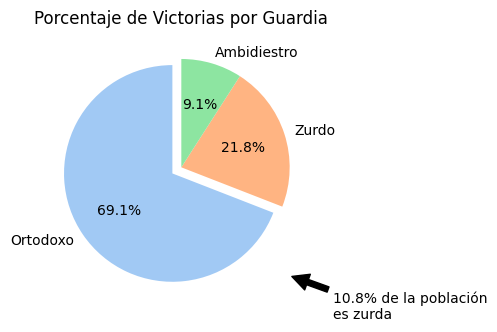

In [546]:
#Creando Visualización:
contador_guardias = df_combinado['Guardia_ganador'].value_counts()
porcentajes_guardias = (contador_guardias / contador_guardias.sum()) * 100

plt.figure(figsize=(5, 5))
plt.pie(porcentajes_guardias, labels=porcentajes_guardias.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette('pastel'), explode=(0.1, 0, 0))
plt.title("Porcentaje de Victorias por Guardia")

#Anotando del porcentaje de zurdos en la población general
plt.annotate('10.8% de la población\nes zurda', xy=(1, -1), xytext=(1.4, -1.4),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10, color='black')

plt.tight_layout()

#Guardando visualización:
#plt.savefig('../utils/visualizaciones/victorias_por_guardia.png')

plt.show()


Los peleadores **zurdos** tienen una mayor probabilidad de **éxito** en la UFC porque están **sobrerrepresentados** entre los ganadores

## Defensa

In [547]:
#Aplicando filtros:
df_1_filtro = df_1_clean[['Victorias', 'Derrotas','Derribos_def']]
df_1_filtro.median()

Victorias       14.00
Derrotas         5.00
Derribos_def     0.63
dtype: float64

In [548]:
#Calculando:
df_1_filtro.loc[:,'Total_Peleas'] = df_1_filtro['Victorias'] + df_1_filtro['Derrotas']
df_1_filtro.loc[:,'Probabilidad_Ganar'] = df_1_filtro['Victorias'] / df_1_filtro['Total_Peleas']

 Para esta hipótesis se supondrá que una **buena defensa** será apartir de 0.6


In [549]:
#Creando umbral de defensa:
umbral_defensa = 0.6                                            
df_buena_defensa = df_1_filtro[df_1_filtro['Derribos_def'] >= umbral_defensa]

probabilidad_promedio_ganar = df_buena_defensa['Probabilidad_Ganar'].mean()
print(f"Probabilidad promedio de ganar con buena defensa de derribos: {(round(probabilidad_promedio_ganar,2))*100} %")

Probabilidad promedio de ganar con buena defensa de derribos: 75.0 %


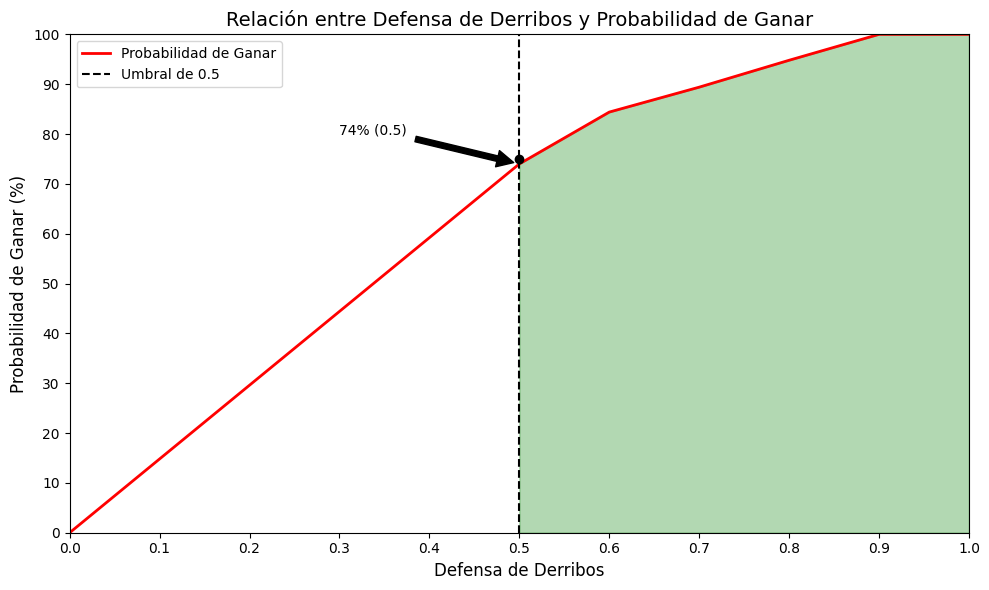

In [550]:
import matplotlib.pyplot as plt
import numpy as np

defensa = np.arange(0, 1.1, 0.1)  
probabilidad_ganar = [0, 14.8, 29.6, 44.4, 59.2, 74, 84.4, 89.4, 94.8, 100,100]  

plt.figure(figsize=(10, 6))
plt.plot(defensa, probabilidad_ganar, color='red', label='Probabilidad de Ganar', linewidth=2)
plt.fill_between(defensa, probabilidad_ganar, where=(defensa >= 0.5), color='green', alpha=0.3)
plt.axvline(x=0.5, color='black', linestyle='--', label='Umbral de 0.5')
plt.plot(0.5, 75, 'o', color='black')  

plt.annotate('74% (0.5)', xy=(0.5, 74), xytext=(0.3, 80),
             arrowprops=dict(facecolor='black', shrink=0.05))



#Configurando el gráfico
plt.title('Relación entre Defensa de Derribos y Probabilidad de Ganar', fontsize=14)
plt.xlabel('Defensa de Derribos', fontsize=12)
plt.ylabel('Probabilidad de Ganar (%)', fontsize=12)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 101, 10))
plt.xlim(0., 1)
plt.ylim(0, 100)
plt.legend()

plt.tight_layout()
#Guardando visualización:
#plt.savefig('../utils/visualizaciones/defensa_frente_victorias.png')

plt.show()


## Edad

In [551]:
#Definiendo la edad de los ganadores y perdedores:
ganadores = df_2[['Ganador']].merge(df_1_clean[['Nombre', 'Edad']], left_on='Ganador', right_on='Nombre', how='left')
ganadores.rename(columns={'Edad': 'Edad_Ganador'}, inplace=True)

perdedores = df_2[['Perdedor']].merge(df_1_clean[['Nombre', 'Edad']], left_on='Perdedor', right_on='Nombre', how='left')
perdedores.rename(columns={'Edad': 'Edad_Perdedor'}, inplace=True)

In [552]:
#Concatenando y limpiando los valores nulos:
resultados = pd.concat([ganadores, perdedores], axis=1)
resultados = resultados[['Ganador', 'Edad_Ganador', 'Perdedor', 'Edad_Perdedor']]

resultados_limpios = resultados.dropna()

In [553]:
#Calculando Medianas:
edad_ganadores = resultados_limpios['Edad_Ganador'].median()
edad_perdedores = resultados_limpios['Edad_Perdedor'].median()

print(f'Mediana de la edad de los ganadores: {edad_ganadores:.2f}')
print(f'Mediana de la edad de los perdedores: {edad_perdedores:.2f}')

Mediana de la edad de los ganadores: 33.00
Mediana de la edad de los perdedores: 34.00


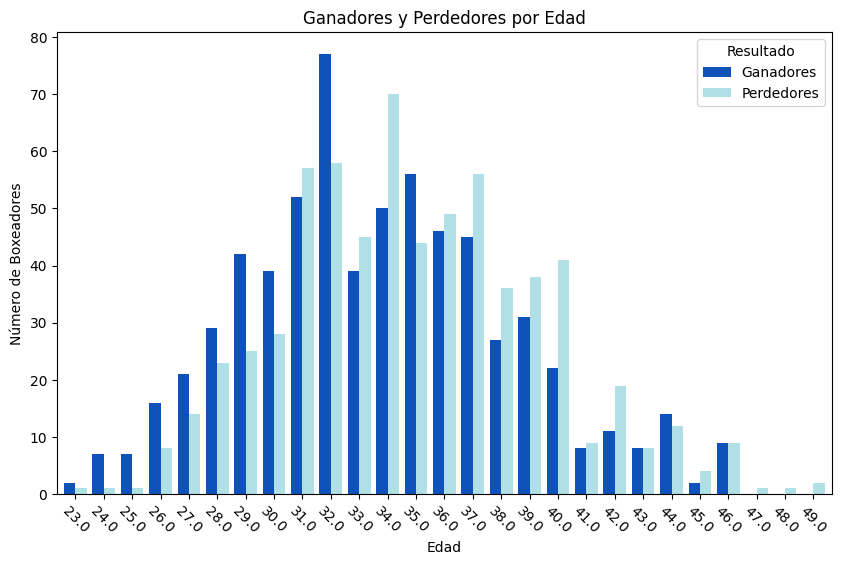

In [554]:
#Visualizando hipótesis:
edades = pd.DataFrame({
    'Ganadores': resultados_limpios['Edad_Ganador'].value_counts(),
    'Perdedores': resultados_limpios['Edad_Perdedor'].value_counts()
}).fillna(0)


edades = edades.reset_index()
edades.columns = ['Edad', 'Ganadores', 'Perdedores']


edades.set_index('Edad', inplace=True)

edades.plot(kind='bar', figsize=(10, 6), color=['#0F52BA', '#B0E0E6'], width=0.8)

# Personalizando el gráfico
plt.title('Ganadores y Perdedores por Edad')
plt.xlabel('Edad')
plt.ylabel('Número de Boxeadores')
plt.xticks(rotation=315)
plt.legend(title='Resultado')

# Guardando visualización
#plt.savefig('../utils/visualizaciones/edad_victorias.png')

# Mostrar gráfico
plt.show()


## KO's

In [555]:
#Filtrando el DataFrame:
df_2_filtro = df_2[["Ganador","Division","Metodo","Detalles"]]

In [556]:
#Contando KO's por division:

dict_golpes = {
    "Punches": "Golpes",
    "Kick": "Patada",
    "Punch": "Puño",
    "Elbows": "Codos",
    "Elbow": "Codo",
    "Flying Knee": "Rodilla Voladora",
    "Knees": "Rodillas",
    "Knee": "Rodilla",
    "Kicks": "Patadas",
    "Spinning Back Kick": "Patada Circular",
    "Spinning Back Fist": "Puñetazo Circular",
    "Spinning Back Elbow": "Codazo Circular",
    "Headbutts": "Cabezazos",
    "Slam": "Golpe Bajo"
}

golpes_list = list(dict_golpes.values())

df_ko_golpes = df_2_filtro[
    (df_2_filtro['Metodo'] == 'KO/TKO') & 
    (df_2_filtro['Detalles'].str.contains('|'.join(golpes_list), na=False))
]
conteo_ko_por_division = df_ko_golpes['Division'].value_counts()
conteo_ko_por_division

Division
Peso Welter          385
Peso Medio           351
Peso Pesado          351
Peso Ligero          349
Peso Semipesado      276
Peso Gallo           222
Peso Pluma           195
Peso Mosca           107
Peso Abierto          41
Peso Paja             38
Peso Pactado          18
Peso Super Pesado      1
Name: count, dtype: int64

In [557]:
#Contabilizando por Division:
conteo_total_por_division = df_2_filtro['Division'].value_counts()


In [558]:
#Calculando probabilidad de KO:
probabilidad_ko = conteo_ko_por_division / conteo_total_por_division
probabilidad_ko.sort_values(ascending = False)

Division
Peso Super Pesado    1.000000
Peso Pesado          0.783482
Peso Semipesado      0.716883
Peso Medio           0.616872
Peso Welter          0.615016
Peso Pluma           0.603715
Peso Gallo           0.576623
Peso Pactado         0.545455
Peso Ligero          0.545312
Peso Abierto         0.488095
Peso Mosca           0.479821
Peso Paja            0.391753
Name: count, dtype: float64

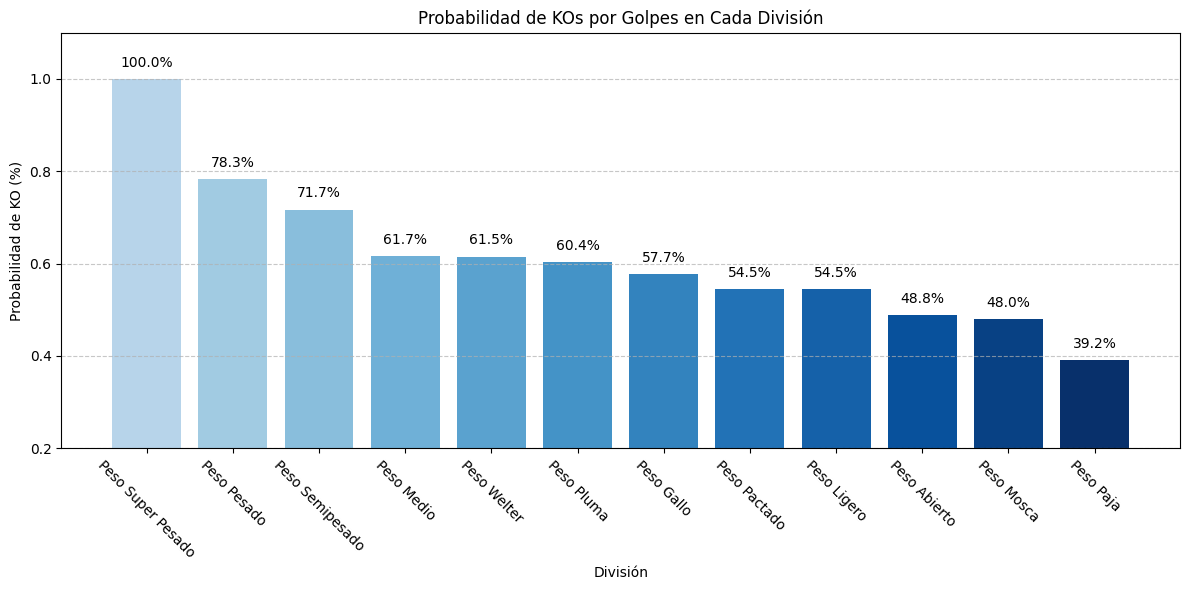

In [559]:
#Visualizando:

plt.figure(figsize=(12, 6))

probabilidad_ko = probabilidad_ko.sort_values(ascending = False)

colores = plt.cm.Blues(np.linspace(0.3, 1, len(probabilidad_ko)))

bars = plt.bar(probabilidad_ko.index, probabilidad_ko, color=colores,)
plt.title('Probabilidad de KOs por Golpes en Cada División')
plt.xlabel('División')
plt.ylabel('Probabilidad de KO (%)')
plt.xticks(rotation=315)
plt.ylim(0.2, 1.1)
plt.axhline(0, color='black', lw=0.8)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.1%}', ha='center', va='bottom')

#Guardando visualizacion
#plt.savefig("../utils/visualizaciones/KO's_division.png")

plt.show()

## Altura

In [560]:
# Filtrando los datos necesarios:
df_1_filtro = df_1_clean[['Nombre', 'Altura', 'Alcance']] 
df_2_filtro = df_2[['Ganador', 'Perdedor']]

In [561]:
#Obteniendo alturas y alcances de ganadores y perdedores:
ganadores = df_2_filtro[['Ganador']].merge(df_1_filtro, left_on='Ganador', right_on='Nombre', how='left')
ganadores.rename(columns={'Altura': 'Altura_Ganador', 'Alcance': 'Alcance_Ganador'}, inplace=True)

perdedores = df_2_filtro[['Perdedor']].merge(df_1_filtro, left_on='Perdedor', right_on='Nombre', how='left')
perdedores.rename(columns={'Altura': 'Altura_Perdedor', 'Alcance': 'Alcance_Perdedor'}, inplace=True)

In [562]:
#Combinando ambos DataFrames:
resultados = pd.concat([ganadores[['Ganador', 'Altura_Ganador', 'Alcance_Ganador']],
                        perdedores[['Perdedor', 'Altura_Perdedor', 'Alcance_Perdedor']]], axis=1)

In [563]:
#Eliminando filas con MissingValues:
resultados = resultados.dropna()

In [564]:
#Contando victorias y empates:
resultados['Ganador_Mas_Alto'] = resultados['Altura_Ganador'] > resultados['Altura_Perdedor']
resultados['Ganador_Mas_Bajo'] = resultados['Altura_Ganador'] < resultados['Altura_Perdedor']
resultados['Empate_Altura'] = resultados['Altura_Ganador'] == resultados['Altura_Perdedor']

#Contando totales:
total_ganador_mas_alto = resultados['Ganador_Mas_Alto'].sum()
total_ganador_mas_bajo = resultados['Ganador_Mas_Bajo'].sum()
total_empates_altura = resultados['Empate_Altura'].sum()

In [565]:
#Contan victorias y empates en alcance:
resultados['Ganador_Mas_Alto_Alcance'] = resultados['Alcance_Ganador'] > resultados['Alcance_Perdedor']
resultados['Ganador_Mas_Bajo_Alcance'] = resultados['Alcance_Ganador'] < resultados['Alcance_Perdedor']
resultados['Empate_Alcance'] = resultados['Alcance_Ganador'] == resultados['Alcance_Perdedor']

#Contando totales:
total_ganador_mas_alto_alcance = resultados['Ganador_Mas_Alto_Alcance'].sum()
total_ganador_mas_bajo_alcance = resultados['Ganador_Mas_Bajo_Alcance'].sum()
total_empates_alcance = resultados['Empate_Alcance'].sum()

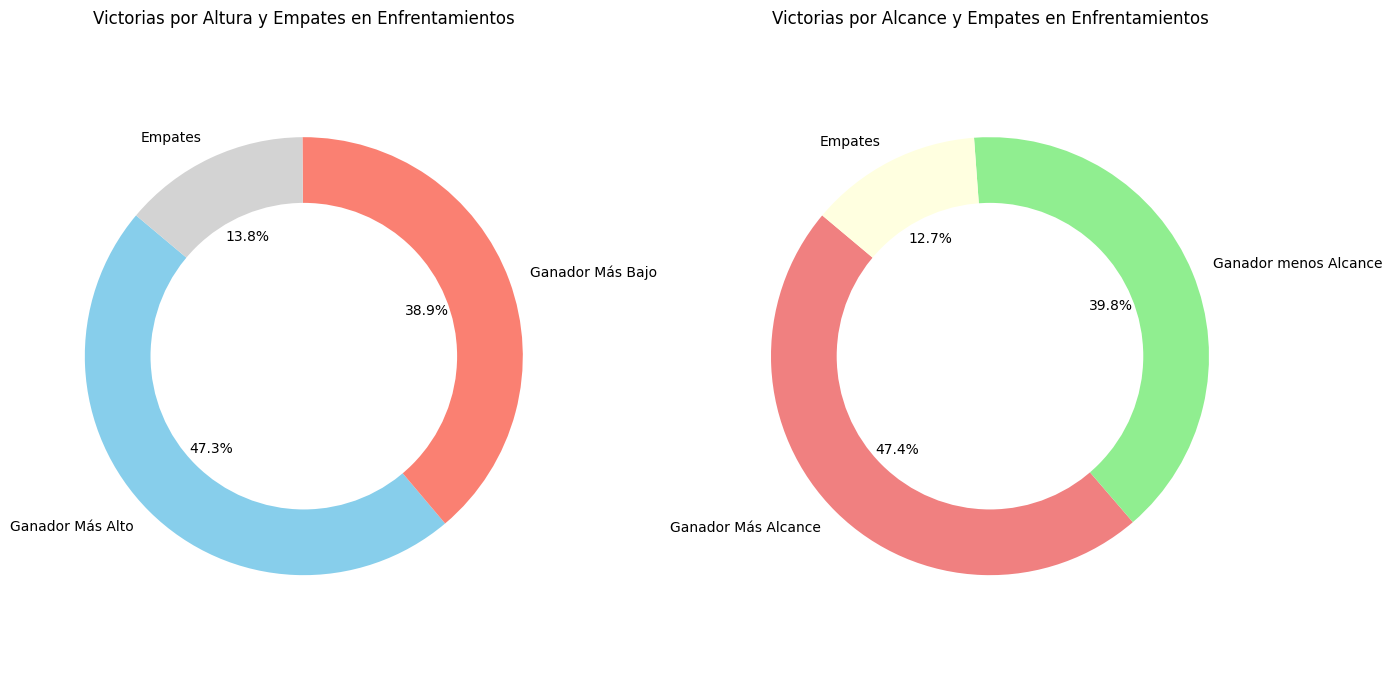

In [566]:
#Creando visualización conjunta:
labels_height = ['Ganador Más Alto', 'Ganador Más Bajo', 'Empates']
sizes_height = [total_ganador_mas_alto, total_ganador_mas_bajo, total_empates_altura]
colors_height = ['skyblue', 'salmon', 'lightgray']

labels_reach = ['Ganador Más Alcance', 'Ganador menos Alcance', 'Empates']
sizes_reach = [total_ganador_mas_alto_alcance, total_ganador_mas_bajo_alcance, total_empates_alcance]
colors_reach = ['lightcoral', 'lightgreen', 'lightyellow']


fig, axs = plt.subplots(1, 2, figsize=(14, 7))

axs[0].pie(sizes_height, labels=labels_height, colors=colors_height, autopct='%1.1f%%', startangle=140)
centre_circle_height = plt.Circle((0, 0), 0.70, fc='white') 
axs[0].add_artist(centre_circle_height)
axs[0].set_title('Victorias por Altura y Empates en Enfrentamientos')
axs[0].axis('equal')  

axs[1].pie(sizes_reach, labels=labels_reach, colors=colors_reach, autopct='%1.1f%%', startangle=140)
centre_circle_reach = plt.Circle((0, 0), 0.70, fc='white') 
axs[1].add_artist(centre_circle_reach)
axs[1].set_title('Victorias por Alcance y Empates en Enfrentamientos')
axs[1].axis('equal')  

plt.tight_layout()

#Guardando visualizacion
#plt.savefig("../utils/visualizaciones/alcance_y_altura.png")

plt.show()


In [567]:
#Calculando correlacion:
correlacion = df_1_clean[['Altura', 'Alcance']].corr().iloc[0, 1]
print(f'La correlación entre alcance y altura es: {round(correlacion,2)}')


La correlación entre alcance y altura es: 0.89


## Mapamundi

Para la generación del mapa mundi se usará la librería ***"Folium"*** y se encapsulará la función principal en [Mapa_mundi_main.py](../utils/Mapa_mundi/Mapa_mundi_main.py) y los definiciones auxiliares en [Mapa_mundi_utils.py](../utils/Mapa_mundi/Mapa_mundi_utils.py).  

Se generara un ***".html"*** con el mapa mundial situando **los 10 primeros paises** con mas luchadores aumentando el grosor del circulo representante en función del **numero de peleadores** que ha habido a lo largo de la historia en ese país

&nbsp; 
# **Proximamente...** ⏳ ⏳

-Adaptar el proyecto a ***MACHINE-LEARNING***